# Cargar y explorar los datos:

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score

# If necessary, install required packages (use pip in the terminal)
# pip install matplotlib scikit-learn pandas
# pip install pandas-profiling

# 2. Cargar el dataset
df_train = pd.read_csv('./dataset/train.csv')  # Change this to the correct local path
df_test = pd.read_csv('./dataset/test.csv')    # Change this to the correct local path


In [9]:
# Resumen de la información del dataframe
df_train.info()
df_train.head()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11030 entries, 0 to 11029
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 11030 non-null  int64  
 1   Game Title         11030 non-null  object 
 2   Year               11014 non-null  float64
 3   Publisher          9992 non-null   object 
 4   North America      11030 non-null  float64
 5   Europe             11030 non-null  float64
 6   Japan              11030 non-null  float64
 7   Rest of World      11030 non-null  float64
 8   Global             11030 non-null  float64
 9   Number of Reviews  11030 non-null  object 
 10  Summary            1098 non-null   object 
 11  Wishlist           11030 non-null  object 
 12  Platform           11030 non-null  object 
 13  Genre              11030 non-null  object 
 14  Rating             11030 non-null  float64
dtypes: float64(7), int64(1), object(7)
memory usage: 1.3+ MB


,id,Game Title,Year,Publisher,North America,Europe,Japan,Rest of World,Global,Number of Reviews,Summary,Wishlist,Platform,Genre,Rating
0,1,Bloodstained: Curse of the Moon,2007.0,NaN,0.08,0.02,0.00,0.01,0.17,341.0,“Bloodstained: Curse of the Moon” is packed wi...,397.0,2600,Platform,7.345609
1,2,Plants vs. Zombies,2007.0,NaN,0.08,0.02,0.00,0.01,0.17,719.0,"Zombies are invading your home, and the only d...",82.0,2600,Puzzle,6.511195
2,3,Zero Escape: Zero Time Dilemma,2007.0,NaN,0.08,0.02,0.00,0.01,0.17,350.0,Zero Time Dilemma is the third and final entry...,402.0,2600,Puzzle,6.651093
3,4,Zelda II: The Adventure of Link,1987.0,Nintendo,2.19,0.50,1.61,0.08,4.38,756.0,Zelda II: The Adventure of Link is the second ...,290.0,NES,Adventure,7.900000
4,5,Yume Nikki,2007.0,NaN,0.08,0.02,0.00,0.01,0.17,770.0,Yume Nikki is a 32-Bit freeware game created b...,771.0,2600,Adventure,7.152074


In [10]:
missing_values = df_train.isnull().sum()
print(missing_values)


id                      0
Game Title              0
Year                   16
Publisher            1038
North America           0
Europe                  0
Japan                   0
Rest of World           0
Global                  0
Number of Reviews       0
Summary              9932
Wishlist                0
Platform                0
Genre                   0
Rating                  0
dtype: int64


# Rellenar valores faltantes:
En Publisher, puedes rellenar con una categoría como "Unknown" si no es crucial.
Para Summary, podrías eliminarla si no es relevante para la clasificación o utilizar técnicas de procesamiento de texto si planeas incluirla.

In [11]:
# Rellenar valores faltantes
df_train['Year'] = df_train['Year'].fillna(df_train['Year'].median())
df_test['Year'] = df_test['Year'].fillna(df_test['Year'].median())

df_train['Publisher'] = df_train['Publisher'].fillna('Unknown')
df_test['Publisher'] = df_test['Publisher'].fillna('Unknown')

#Drop summary
df_train = df_train.drop(columns=['Summary'])

#Check Missing values
missing_values = df_train.isnull().sum()
print(missing_values)

missing_values2 = df_test.isnull().sum()
print(missing_values2)


id                   0
Game Title           0
Year                 0
Publisher            0
North America        0
Europe               0
Japan                0
Rest of World        0
Global               0
Number of Reviews    0
Wishlist             0
Platform             0
Genre                0
Rating               0
dtype: int64
id                   0
Game Title           0
Year                 0
Publisher            0
North America        0
Europe               0
Japan                0
Rest of World        0
Global               0
Number of Reviews    0
Wishlist             0
Platform             0
Genre                0
dtype: int64


# Convertir variables categóricas:

In [14]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder  # Importa LabelEncoder
def convert_to_numeric(value):
        # Convert the value to string and then process it
        value_str = str(value)
        # If the value contains 'K', multiply by 1000
        if 'K' in value_str:
            return int(float(value_str.replace('K', '')) * 1000)
        else:
            return int(float(value_str))
# Aplicar la conversión en la columna
df_train['Europe'] = df_train['Europe'].apply(convert_to_numeric)
df_test['Europe'] = df_test['Europe'].apply(convert_to_numeric)

df_train['Japan'] = df_train['Japan'].apply(convert_to_numeric)
df_test['Japan'] = df_test['Japan'].apply(convert_to_numeric)

df_train['Rest of World'] = df_train['Rest of World'].apply(convert_to_numeric)
df_test['Rest of World'] = df_test['Rest of World'].apply(convert_to_numeric)

df_train['North America'] = df_train['North America'].apply(convert_to_numeric)
df_test['North America'] = df_test['North America'].apply(convert_to_numeric)

df_train['Global'] = df_train['Global'].apply(convert_to_numeric)
df_test['Global'] = df_test['Global'].apply(convert_to_numeric)

df_train['Number of Reviews'] = df_train['Number of Reviews'].apply(convert_to_numeric)
df_test['Number of Reviews'] = df_test['Number of Reviews'].apply(convert_to_numeric)

df_train['Wishlist'] = df_train['Wishlist'].apply(convert_to_numeric)
df_test['Wishlist'] = df_test['Wishlist'].apply(convert_to_numeric)


print(df_train.head())

label_encoder = LabelEncoder()
for column in ['Game Title', 'Publisher', 'Platform', 'Genre']:
    df_train[column] = label_encoder.fit_transform(df_train[column])
    df_test[column] = label_encoder.fit_transform(df_test[column])

# Separar características y objetivo
#X = df_train.drop(columns=['id', 'Rating'])
#y = df_train['Rating']

   id  Game Title    Year  Publisher  North America  Europe  Japan  \
0   1         891  2007.0        500              0       0      0   
1   2        7003  2007.0        500              0       0      0   
2   3       10955  2007.0        500              0       0      0   
3   4       10947  1987.0        337              2       0      1   
4   5       10927  2007.0        500              0       0      0   

   Rest of World  Global  Number of Reviews  Wishlist  Platform  Genre  \
0              0       0                341       397         0     11   
1              0       0                719        82         0     13   
2              0       0                350       402         0     13   
3              0       4                756       290        10      1   
4              0       0                770       771         0      1   

     Rating  
0  7.345609  
1  6.511195  
2  6.651093  
3  7.900000  
4  7.152074  


# Separar características y objetivo

In [15]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import cross_val_score
import numpy as np

# Supongamos que df_train es tu DataFrame y 'Rating' es la columna objetivo.
# X contiene las características, Y contiene la variable objetivo (Rating).
X = df_train.drop(columns=['Rating'])  # Eliminar la columna objetivo
Y = df_train['Rating']  # Variable objetivo

# Dividir los datos en entrenamiento y prueba, con un tamaño de prueba de 1/3
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.33, random_state=42)

# Definir un rango de profundidades a evaluar
depth_range = range(1, 21)

# Lista para almacenar las puntuaciones de cada profundidad
mean_scores = []

# Realizar la validación cruzada para cada profundidad
for depth in depth_range:
    # Crear el modelo con la profundidad especificada y el criterio adecuado
    model = DecisionTreeRegressor(max_depth=depth, criterion='squared_error', random_state=42)

    # Realizar validación cruzada y obtener la puntuación promedio
    scores = cross_val_score(model, X_train, Y_train, cv=5, scoring='neg_mean_squared_error')

    # Guardar la puntuación media (tomando el valor absoluto de la MSE negativa)
    mean_scores.append(np.mean(np.abs(scores)))

# Encontrar la mejor profundidad basada en la puntuación promedio
best_depth = depth_range[np.argmin(mean_scores)]
best_score = min(mean_scores)

print(f"Mejor profundidad: {best_depth}")
print(f"Error cuadrático medio promedio con validación cruzada: {best_score:.4f}")




Mejor profundidad: 4
Error cuadrático medio promedio con validación cruzada: 0.1322


# Hacer arbol y evaluarlo:

Error cuadrático medio (MSE) en el conjunto de prueba: 0.1205


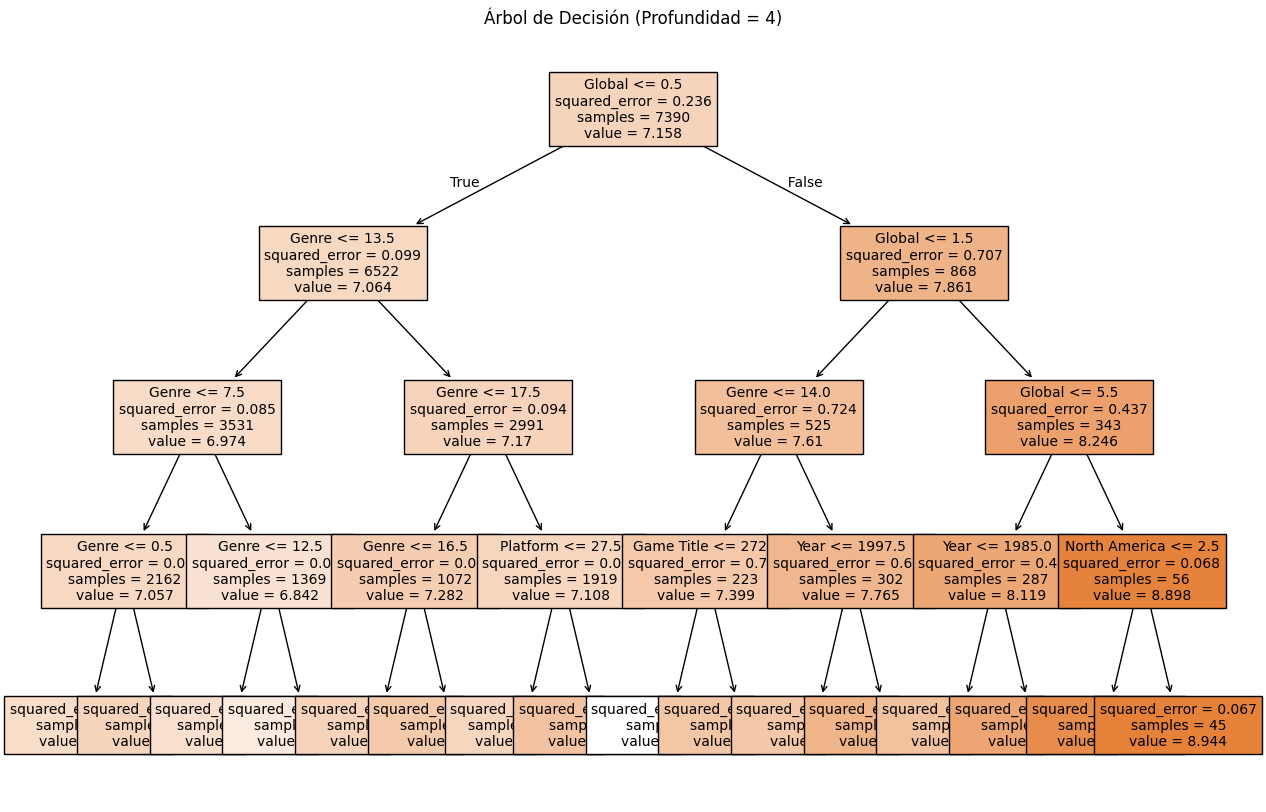

In [16]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
from sklearn import tree  # Importar 'tree' para graficar el árbol

# Crear el modelo con la mejor profundidad
best_model = DecisionTreeRegressor(max_depth=best_depth, criterion='squared_error', random_state=42)

# Entrenar el modelo con el conjunto de entrenamiento
best_model.fit(X_train, Y_train)

# Realizar predicciones sobre el conjunto de prueba
Y_pred = best_model.predict(X_test)

# Calcular el error cuadrático medio (MSE) en el conjunto de prueba
mse = mean_squared_error(Y_test, Y_pred)
print(f"Error cuadrático medio (MSE) en el conjunto de prueba: {mse:.4f}")

# Graficar el árbol de decisión
plt.figure(figsize=(15, 10))
tree.plot_tree(best_model, filled=True, feature_names=X.columns, fontsize=10)
plt.title(f"Árbol de Decisión (Profundidad = {best_depth})")
plt.show()



In [17]:
# Crear un DataFrame para las predicciones
submission = pd.DataFrame({
    'Id': X_test['id'],  # Usar df_test para obtener los identificadores
    'Prediction': Y_pred
})

# Guardar el DataFrame como un archivo CSV
submission.to_csv('submission.csv', index=False)

Importamos librerias

In [18]:
from joblib import dump, load
dump(best_model, 'tree.joblib')

#model.load('tree.joblib')
#model.predict(X_test)
 #  Guardar el modelo en un archivo

['tree.joblib']